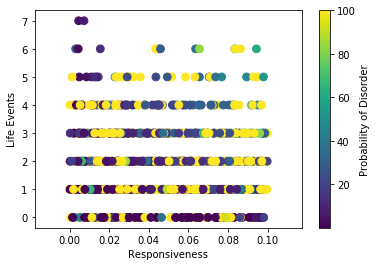

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np

life_events = np.random.poisson(2,1000)
responsiveness = np.random.uniform(0,0.1,1000)
initial_prob = np.random.weibull(0.2,1000)
df = pd.DataFrame()

for i,α,ψ in zip(life_events, responsiveness, initial_prob):
    p = (α*(i)+ψ)*100
    if p > 100:
        df = df.append({"Life Events": i, "Responsiveness": α, "Initital Probability": ψ, "Probability of Disorder": 100}, ignore_index = True)
    else:
        df = df.append({"Life Events": i, "Responsiveness": α, "Initital Probability": ψ, "Probability of Disorder": p}, ignore_index = True)

df.sort_values(by = ["Probability of Disorder"])

fig, ax = plt.subplots()
df.plot(kind='scatter', 
        x='Responsiveness', 
        y='Life Events', 
        s=60, 
        c='Probability of Disorder', 
        cmap='viridis', 
        ax=ax) 